In [1]:
import sys

sys.path.insert(0, '../')
import utils.common as cm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, FunctionTransformer

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

In [2]:
df = cm.get_dataframe()
df.head()

,year,brand,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_city_Lkm,fuel_hwy_Lkm,fuel_comb_Lkm,fuel_comb_mpg,co2
0,2002,FORD,FOCUS SEDAN #,COMPACT,2.0,4,A4,X,9.1,6.8,8.1,35,186
1,2021,Porsche,Panamera Turbo S,Full-size,4.0,8,AM8,Z,15.3,11.2,13.5,21,326
2,2011,INFINITI,EX35 AWD,STATION WAGON - SMALL,3.5,6,AS7,Z,12.4,8.5,10.6,27,244
3,2005,BUICK,RENDEZVOUS AWD,SUV,3.4,6,A4,X,12.7,8.7,10.9,26,251
4,2016,ROLLS-ROYCE,GHOST EWB,FULL-SIZE,6.6,12,AS8,Z,19.2,12.4,16.1,18,373


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18044 entries, 0 to 18043
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           18044 non-null  int64  
 1   brand          18044 non-null  object 
 2   model          18044 non-null  object 
 3   vehicle_class  18044 non-null  object 
 4   engine_size    18044 non-null  float64
 5   cylinders      18044 non-null  int64  
 6   transmission   18044 non-null  object 
 7   fuel_type      18044 non-null  object 
 8   fuel_city_Lkm  18044 non-null  float64
 9   fuel_hwy_Lkm   18044 non-null  float64
 10  fuel_comb_Lkm  18044 non-null  float64
 11  fuel_comb_mpg  18044 non-null  int64  
 12  co2            18044 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 1.8+ MB


In [4]:
features_num = list(df.columns[df.dtypes != "object"])
features_num

['year',
 'engine_size',
 'cylinders',
 'fuel_city_Lkm',
 'fuel_hwy_Lkm',
 'fuel_comb_Lkm',
 'fuel_comb_mpg',
 'co2']

In [5]:
features_transform = features_num.copy()
features_transform.remove("cylinders")

features_transform

['year',
 'engine_size',
 'fuel_city_Lkm',
 'fuel_hwy_Lkm',
 'fuel_comb_Lkm',
 'fuel_comb_mpg',
 'co2']

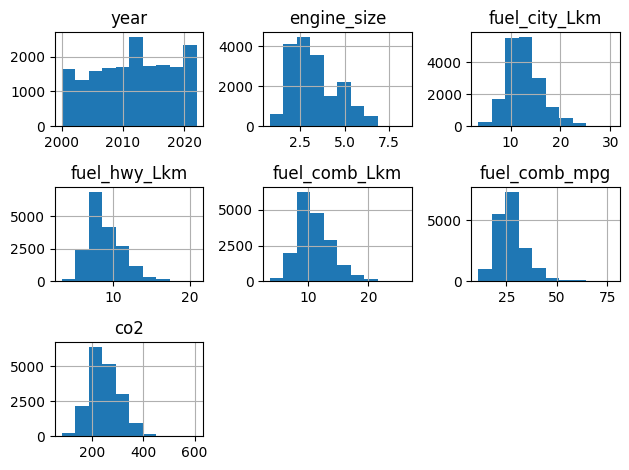

In [6]:
df[features_transform].hist()
plt.tight_layout()

In [7]:
features_log = features_transform.copy()
features_log.remove("year")

In [8]:
target = "fuel_comb_mpg"

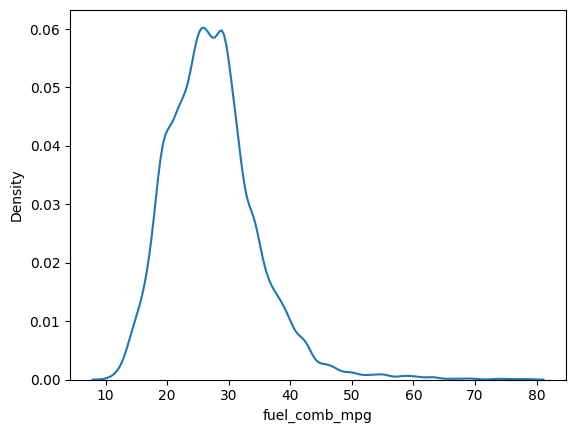

In [9]:
sns.kdeplot(df[target]);

In [10]:
# Transformación logarítmica
log_transformer = FunctionTransformer(lambda x: np.log(x + 1))  # Sumar 1 para evitar log(0)

# Pipeline para transformación logarítmica y escalado
num_pipeline = Pipeline([
    ("log", log_transformer),
    ("scaler", MinMaxScaler()) 
])

# Preprocesador con todas las transformaciones
preprocessing_pipeline = ColumnTransformer([
    ("log_and_scaler", num_pipeline, features_log), 
    ("scaler_only", MinMaxScaler(), ["year"]),
    ("ohe", OneHotEncoder(handle_unknown = "ignore"), ["cylinders"])  # OneHotEncoding
])

# Aplicar las transformaciones
train = preprocessing_pipeline.fit_transform(df)
pd.DataFrame(train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.309044,0.414790,0.374857,0.384678,0.582960,0.403983,0.090909,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.618088,0.660357,0.645725,0.647368,0.321636,0.686089,0.954545,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.554346,0.559842,0.494251,0.521545,0.449604,0.540354,0.500000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.540750,0.571202,0.506867,0.535943,0.430306,0.554574,0.227273,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.871403,0.770418,0.702536,0.740366,0.243843,0.753881,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18039,0.540750,0.637836,0.650668,0.631594,0.345223,0.645941,0.181818,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
18040,0.402303,0.490237,0.390188,0.437857,0.520460,0.457709,0.181818,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
18041,0.686650,0.621123,0.468202,0.559150,0.410280,0.576142,0.363636,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
18042,0.402303,0.434717,0.390188,0.402967,0.568012,0.427712,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
train.shape

(18044, 16)